In [1]:
import pickle

# Unpickling the data
with open("/content/images.p","rb") as f:
  images = pickle.load(f)

with open("/content/labels.p","rb") as f:
  labels = pickle.load(f)

In [2]:
print(images.shape)
print(labels.shape)

(287, 100, 100)
(287,)


In [3]:
set(labels)

{np.str_('Arpita'), np.str_('Manas'), np.str_('Priya'), np.str_('Soumya')}

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [5]:
set(labels)

{np.int64(0), np.int64(1), np.int64(2), np.int64(3)}

In [6]:
le.inverse_transform([0,1,2,3])

array(['Arpita', 'Manas', 'Priya', 'Soumya'], dtype='<U6')

In [7]:
p = len(set(labels))
print("Total number of persons:",p)

Total number of persons: 4


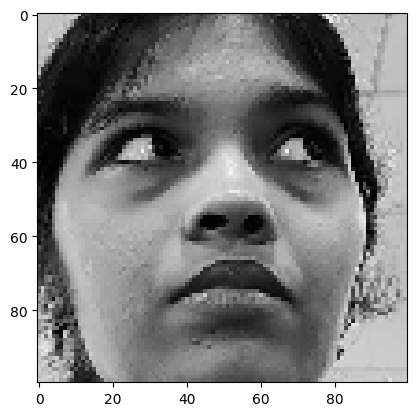

In [8]:
import matplotlib.pyplot as plt
plt.imshow(images[85],cmap='gray')
plt.show()

In [9]:
import cv2

In [10]:
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100,100,1)
  img = img/255
  return img

In [11]:
import numpy as np

In [12]:
images = np.array(list(map(preprocessing,images)))
print("Shape of Input : ",images.shape)

Shape of Input :  (287, 100, 100, 1)


In [13]:
from keras.utils import to_categorical
labels = to_categorical(labels)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Conv2D,MaxPooling2D,Flatten

In [15]:
# Model Training
def Lenet_model():
  model = Sequential()
  # Convolutional and Relu layer
  model.add(Conv2D(30,(5,5),input_shape=(100,100,1),activation='relu'))

  # Max Pooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))

  # Convolutional and Relu Layer
  model.add(Conv2D(15,(3,3),activation='relu'))

  # Max Pooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))

  # Flatten layer/ Input Layer
  model.add(Flatten())

  # Hidden Layer
  model.add(Dense(50,activation='relu'))
  model.add(Dense(30,activation='relu'))

  # Output Layer
  model.add(Dense(p,activation='softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model


In [16]:
model = Lenet_model()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7935)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │       396,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403,299 (1.54 MB)

 Trainable params: 403,299 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
h = model.fit(images,labels,validation_split=0.1,epochs=20)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 329ms/step - accuracy: 1.0000 - loss: 1.0339e-04 - val_accuracy: 1.0000 - val_loss: 4.7711e-04
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - accuracy: 1.0000 - loss: 7.6841e-05 - val_accuracy: 1.0000 - val_loss: 5.9420e-04
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - accuracy: 1.0000 - loss: 6.0157e-05 - val_accuracy: 1.0000 - val_loss: 6.5434e-04
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 1.0000 - loss: 7.2235e-05 - val_accuracy: 1.0000 - val_loss: 6.9845e-04
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 1.0000 - loss: 8.2485e-05 - val_accuracy: 1.0000 - val_loss: 6.7461e-04
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 333ms/step - accuracy: 1.0000 - loss: 8.1829e-05 - val_accuracy: 1.0000 - val_loss: 6.3639e-04
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 247ms/step - accuracy: 1.0000 - loss: 4.7696e-05 - val_accuracy: 1.0000 - val_loss: 6.1238e-04
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 

In [19]:
model.save("Final_model.h5")